# 1. Import Necessary Libraries

In [ ]:
# Install necessary packages
!pip install snowflake-connector-python
!pip install snowflake-sqlalchemy
!pip install sqlalchemy
!pip install pandas
!pip install seaborn
!pip install matplotlib

In [ ]:
import pandas as pd
import numpy as np
from snowflake.sqlalchemy import URL
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

# 2. Connect to Snowflake and Load Data

In [ ]:
ACCOUNT = <account>
USER = <user>
PASSWORD = <password>
WAREHOUSE = <warehouse>
DATABASE = <database>
SCHEMA = <schema>

# Create connection URL
engine = create_engine(URL(
    account=ACCOUNT,
    user=USER,
    password=PASSWORD,
    warehouse=WAREHOUSE,
    database=DATABASE,
    schema=SCHEMA,
))

# Create a connection
connection = engine.connect()

# Load data into pandas DataFrames
customer_segment = pd.read_sql_query("SELECT recency_score, frequency_score, monetary_score, segment FROM dim_customer_segment", connection)

# Close the connection
connection.close()

In [ ]:
customer_segment.head()

,recency_score,frequency_score,monetary_score,segment
0,0.582102,0.628632,0.819239,Loyal Customers
1,0.146567,0.628632,0.863875,Loyal Customers
2,0.193205,0.628632,0.969810,Loyal Customers
3,0.186766,0.628632,0.788130,Loyal Customers
4,0.645945,0.628632,0.816101,Loyal Customers


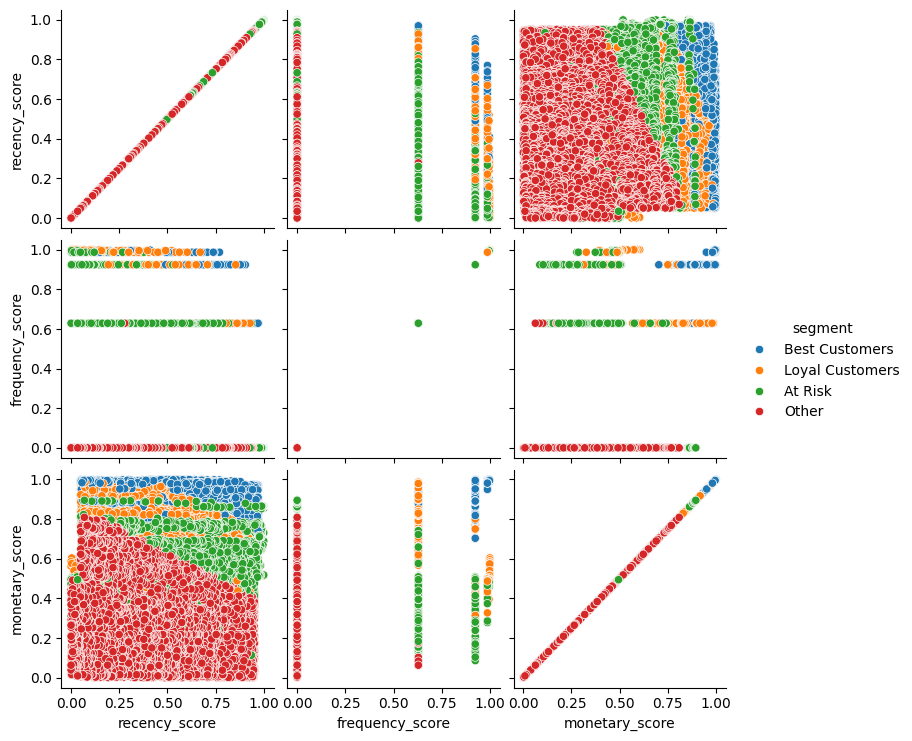

In [ ]:
# Set the order of the legend (segment) with Best Customers on top
hue_order = ['Best Customers', 'Loyal Customers', 'At Risk', 'Other']
sns.pairplot(customer_segment, hue='segment', vars=['recency_score', 'frequency_score', 'monetary_score'], hue_order=hue_order, diag_kind=None)
plt.show()